In [137]:
import cv2
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [102]:
img = cv2.imread('/content/la2 (1).png',cv2.IMREAD_GRAYSCALE)
print(type(img))

<class 'numpy.ndarray'>


In [103]:
img.shape

(582, 737)

In [104]:
rows,col = img.shape
print(rows,col)

582 737


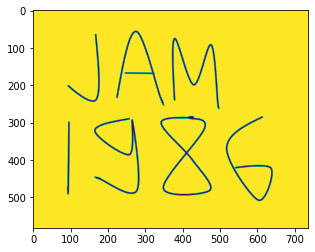

In [105]:
#img = cv2.resize(img, (int(col/8), int(rows/8)))
plt.imshow(img)

In [106]:
#img2 = img[40:260, 50:310]
#plt.imshow(img2)

In [107]:
(thresh, im_bw) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [108]:
cv2.imwrite('/content/black-and-white.jpg',im_bw) 

True

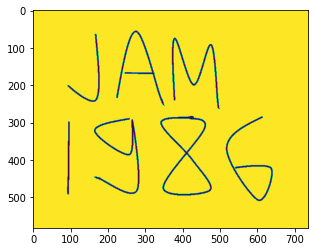

In [109]:
plt.imshow(im_bw)

In [110]:
print(type(im_bw))

<class 'numpy.ndarray'>


In [111]:
from PIL import Image
from numpy import asarray
import numpy as np

In [112]:
image = Image.open('/content/black-and-white.jpg')

In [113]:
print(image.format) 
print(image.size) 
print(image.mode)

JPEG
(737, 582)
L


L (8-bit pixels, black and white)

In [114]:
numpydata = asarray(image)

In [115]:
print(type(numpydata))
print(numpydata.shape)
print(numpydata)


<class 'numpy.ndarray'>
(582, 737)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [116]:
x,y = numpydata.shape
print(x,y)

582 737


In [117]:
data = []

In [118]:
p = 0

In [119]:
for i in range(x):
  for j in range (y):
    if numpydata[i][j]==False:
      pair = (j, i)
      data.insert(p, pair)
      p = p+1

In [120]:
print(p)

9478


In [121]:
print(data)
print(type(data))

[(273, 55), (274, 55), (276, 55), (271, 56), (272, 56), (273, 56), (274, 56), (275, 56), (278, 56), (270, 57), (273, 57), (274, 57), (275, 57), (276, 57), (278, 57), (269, 58), (271, 58), (272, 58), (274, 58), (276, 58), (279, 58), (267, 59), (268, 59), (269, 59), (270, 59), (271, 59), (276, 59), (278, 59), (279, 59), (280, 59), (268, 60), (269, 60), (278, 60), (280, 60), (282, 60), (265, 61), (266, 61), (268, 61), (269, 61), (279, 61), (281, 61), (266, 62), (281, 62), (282, 62), (284, 62), (265, 63), (266, 63), (267, 63), (280, 63), (282, 63), (283, 63), (284, 63), (166, 64), (167, 64), (168, 64), (264, 64), (265, 64), (267, 64), (282, 64), (283, 64), (285, 64), (165, 65), (166, 65), (262, 65), (263, 65), (264, 65), (265, 65), (266, 65), (282, 65), (283, 65), (286, 65), (165, 66), (166, 66), (168, 66), (262, 66), (263, 66), (284, 66), (285, 66), (167, 67), (169, 67), (261, 67), (262, 67), (264, 67), (265, 67), (283, 67), (285, 67), (287, 67), (166, 68), (169, 68), (261, 68), (262, 68)

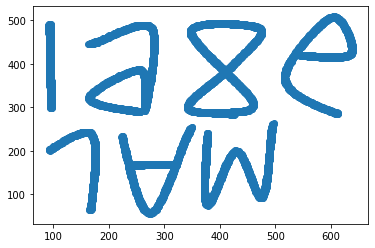

In [122]:
plt.scatter(*zip(*data))
plt.show()

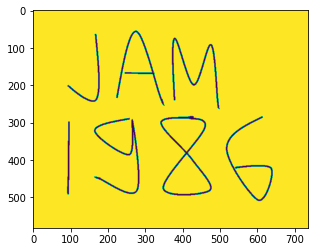

In [123]:
plt.imshow(numpydata)

In [124]:
#calculating the squared euclidean distance between p1(x1, y1) and p2(x2, y2)
def dist(p1 ,p2 ,dimension):
  res = 0;
  for i in range(dimension):
    res += (p1[i]-p2[i])**2
  return res

In [125]:
# D = degree matrix, W = Adjacency matrix, L = laplacian matrix = D - W
# initializing similarity_matrix, degree matrix, weight matrix, laplacian matrix  
similarity_matrix = np.zeros((p,p))
W = np.zeros((p,p))
D = np.zeros((p,p))
L = np.zeros((p,p))

In [126]:
# calculating similarity matrix, a NxN matrix where N is the number of samples
for i in range(p):
  for j in range(p):
    if j<=i:
      similarity_matrix[i][j] = similarity_matrix[j][i] 
    else:
      similarity_matrix[i][j] = dist(data[i],data[j],2)

In [127]:
# creating the adjacency matrix by copying the contents of the similarity matrix  
# setting a threshold such that if the distance is greater than the predefined limit, 
# then set the value to 0 and 1 otherwise.

for i in range(p):
  for j in range(p):
    if(similarity_matrix[i][j]<10000):
      W[i][j] = 1

    else:
      W[i][j] = 0

In [128]:
# Now Let's construct the degree matrix.
# For each row of the degree matrix,  fill the cell along the diagonal
# by summing all the elements of the corresponding row in the adjacency matrix. 

for i in range(p):
  for j in range(p):
    D[i][i] = D[i][i]+W[i][j]

print('degree matrix:')
print(D)

degree matrix:
[[501.   0.   0. ...   0.   0.   0.]
 [  0. 501.   0. ...   0.   0.   0.]
 [  0.   0. 501. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 731.   0.   0.]
 [  0.   0.   0. ...   0. 725.   0.]
 [  0.   0.   0. ...   0.   0. 720.]]


In [136]:
# Let's compute the laplacian matrix
# by subtracting the adjacency matrix from the degree matrix.

L = D-W
print('laplacian matrix:')
print(L)

laplacian matrix:
[[500.  -1.  -1. ...   0.   0.   0.]
 [ -1. 500.  -1. ...   0.   0.   0.]
 [ -1.  -1. 500. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 730.  -1.  -1.]
 [  0.   0.   0. ...  -1. 724.  -1.]
 [  0.   0.   0. ...  -1.  -1. 719.]]


In [138]:
# Once we have the laplacian matrix, we can take advantage of one of its special properties to classify our data.
# If the graph (W) has K connected components, then L has K eigenvectors with an eigenvalue of 0.

eigen_value, eigen_vector = LA.eigh(L)

# eigenvalues
#print('eigenvalues:')
#print(eigen_value)
# eigenvectors
#print('eigenvectors:')
#print(eigen_vector)


In [139]:
print('eigenvalues:')
print(eigen_value)

eigenvalues:
[6.89101875e-13 4.21122069e+01 5.59831241e+01 ... 1.92503415e+03
 1.92784445e+03 1.98177861e+03]


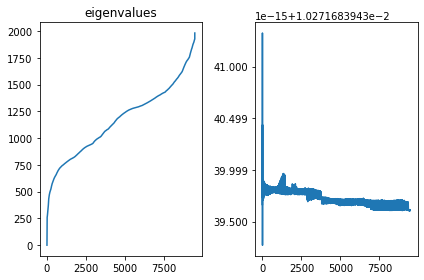

In [140]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(eigen_value)
ax1.title.set_text('eigenvalues')
i = np.where(eigen_value < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(eigen_vector[:, i[0]])
fig.tight_layout()
plt.show()

In [141]:
print(type(eigen_value))

<class 'numpy.ndarray'>


In [142]:

# we use k-means to classify the nodes based off their corresponding values in the eigenvector.

k=6
data1 = np.zeros((p,k))
for i in range(p):
  for j in range(k):
    data1[i][j] = eigen_vector[i][j]

In [143]:
import random
means = np.zeros((k,k))
for i in range(k):
    means[i] = data1[random.randint(0,p)]
print(means)

[[ 0.01027168 -0.00327761 -0.0092029  -0.00154042  0.00331569 -0.00716369]
 [ 0.01027168 -0.00277303  0.01285898 -0.01758254 -0.00470653  0.00399267]
 [ 0.01027168 -0.00902858 -0.00890032  0.00906113 -0.01039464  0.01702048]
 [ 0.01027168  0.02112476  0.00165101  0.00915071 -0.0055703  -0.00116089]
 [ 0.01027168  0.00440801  0.00543937 -0.01684146 -0.00256012 -0.00032653]
 [ 0.01027168  0.01547108 -0.00065132  0.00256596  0.01207586  0.00574121]]


In [144]:
clusters = np.zeros(p)
group = np.zeros(k)
flag = False
iteration = 0

while(flag==False):
  
  iteration += 1
  newmean = np.zeros((k,k))
  countmean = np.zeros(k)

  for i in range(p):
    for j in range(k):
      group[j] = dist(data1[i],means[j],k)
    index = 0
    for j in range(k):
      if(group[j]<group[index]):
        index = j
    clusters[i] = index
    newmean[index]+=data1[i]
    countmean[index]+=1

  newmean = (newmean.transpose()/countmean).transpose()
  comparison = newmean == means
  flag = comparison.all()
  means = newmean
  if(iteration>100):
    flag = True


In [145]:
# implementing spectral clusterings
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
cluster5=[]
cluster6=[]
cc1=0
cc2=0
cc3=0
cc4=0
cc5=0
cc6=0
c=0
for i in clusters:
  if(i==0):
    cluster1.insert(cc1,data[c])
    cc1+=1
  if(i==1):
    cluster2.insert(cc2,data[c])
    cc2+=1
  if(i==2):
    cluster3.insert(cc3,data[c])
    cc3+=1
  if(i==3):
    cluster4.insert(cc4,data[c])
    cc4+=1
  if(i==4):
    cluster5.insert(cc5,data[c])
    cc5+=1
  if(i==5):
    cluster6.insert(cc6,data[c])
    cc6+=1
  c+=1

In [146]:
print(type(cluster1))
len(cluster1)

<class 'list'>


2932

In [147]:
print(c,cc1,cc2,cc3,cc4,cc5,cc6)

9478 2932 1772 1503 898 2210 163


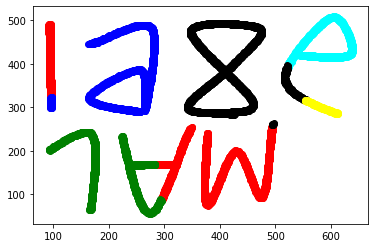

In [148]:
plt.scatter(*zip(*cluster1), color = 'red')
plt.scatter(*zip(*cluster2), color = 'blue')
plt.scatter(*zip(*cluster3), color = 'green')
plt.scatter(*zip(*cluster4), color = 'cyan')
plt.scatter(*zip(*cluster5), color = 'black')
plt.scatter(*zip(*cluster6), color = 'yellow')